
# Jobs Recommendation System


## Business Objective 

**Build a recommendation system that recommends jobs to users based on user preferences and previous jobs viewed.**

We will be using data from Jobs On Naukri.com dataset which is collected from Kaggle.


In [ ]:
## Install packages

#Install Packages

#!pip -q install plotly-express
!pip install surprise
#!pip install chart_studio


## Import Packages


In [2]:
#Import basic packages

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast


from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet


from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import warnings; warnings.simplefilter('ignore')

In [34]:
# Read Data
naukri_data=pd.read_csv('naukri.csv')

In [5]:
#Display first five rows
naukri_data.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [6]:
naukri_data.shape

(30000, 11)


### Data cleaning

In [35]:
naukri_data.drop(['Uniq Id','Crawl Timestamp'],axis = 1 , inplace = True)

In [8]:
# Let's understand data summary
naukri_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
Job Title                  29425 non-null object
Job Salary                 29950 non-null object
Job Experience Required    29427 non-null object
Key Skills                 28729 non-null object
Role Category              27695 non-null object
Location                   29423 non-null object
Functional Area            29427 non-null object
Industry                   29427 non-null object
Role                       29099 non-null object
dtypes: object(9)
memory usage: 2.1+ MB


In [36]:
## Removing null values
naukri_data.dropna(inplace=True)

In [11]:
naukri_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27005 entries, 0 to 29999
Data columns (total 9 columns):
Job Title                  27005 non-null object
Job Salary                 27005 non-null object
Job Experience Required    27005 non-null object
Key Skills                 27005 non-null object
Role Category              27005 non-null object
Location                   27005 non-null object
Functional Area            27005 non-null object
Industry                   27005 non-null object
Role                       27005 non-null object
dtypes: object(9)
memory usage: 2.1+ MB


## Visualization

Most common job titles of people working with data


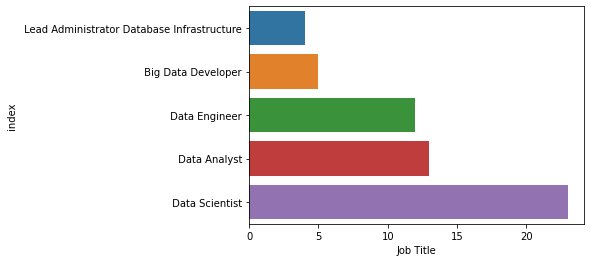

In [42]:
print('Most common job titles of people working with data')
df = naukri_data[naukri_data['Job Title'].str.contains('Data')==True]
df = df.dropna().reset_index()
df1 = df['Job Title'].value_counts().reset_index().head()
df1 = df1.sort_values('Job Title', ascending=True)
sns.barplot(data=df1, y='index', x='Job Title')

What are the most common Job Salaries?


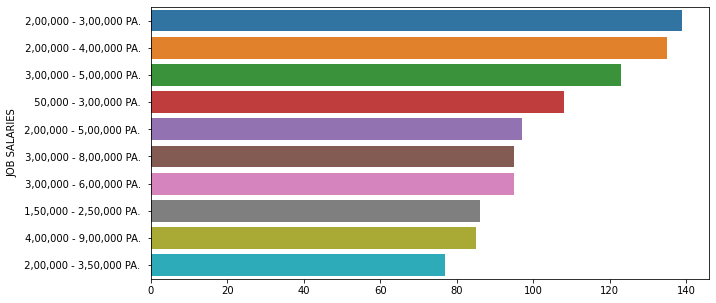

In [20]:
df = naukri_data['Job Salary'].dropna().reset_index()
df = df[df['Job Salary'].str.contains('PA')]

print("What are the most common Job Salaries?")
df = df['Job Salary'].value_counts().reset_index().head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=df, y='index', x='Job Salary')
plt.xlabel('')
plt.ylabel('JOB SALARIES')
plt.show()

What is the most common job experience required?


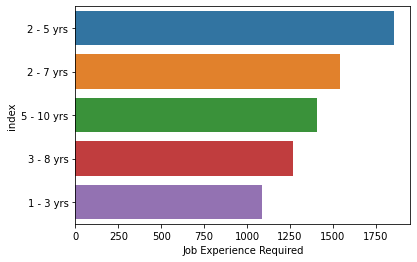

In [48]:
print('What is the most common job experience required?')
df = naukri_data['Job Experience Required'].value_counts().reset_index().head()
sns.barplot(data= df,y='index',x = 'Job Experience Required')

In [64]:
print('Salary range of Data Scientists: 6-45 LPA')
naukri_data.head()

df = naukri_data[naukri_data['Job Title'].str.contains("Data Scientist")]
df1 = df[df['Job Salary'].str.contains("PA")]
df1['Job Salary'].value_counts()

Salary range of Data Scientists: 6-45 LPA


 15,00,000 - 30,00,000 PA.     2
 30,00,000 - 45,00,000 PA.     1
 10,00,000 - 13,00,000 PA.     1
 25,00,000 - 35,00,000 PA.     1
 12,00,000 - 15,00,000 PA.     1
 12,00,000 - 22,00,000 PA.     1
 15,00,000 - 25,00,000 PA.     1
 13,00,000 - 19,00,000 PA.     1
 18,00,000 - 25,00,000 PA.     1
 6,50,000 - 16,50,000 PA.      1
Name: Job Salary, dtype: int64

In [63]:
print('Salary range of Data Analyst: 50k-13 LPA')
naukri_data.head()
df = naukri_data[naukri_data['Job Title'].str.contains("Data Analyst")]
df1 = df[df['Job Salary'].str.contains("PA")]
df1['Job Salary'].value_counts()

Salary range of Data Analyst: 50k-13 LPA


 1,00,000 - 2,00,000 PA.      2
 5,00,000 - 13,00,000 PA.     1
 50,000 - 3,00,000 PA.        1
 1,00,000 - 3,50,000 PA.      1
 3,00,000 - 6,00,000 PA.      1
 5,00,000 - 9,00,000 PA.      1
 1,50,000 - 3,50,000 PA.      1
 50,000 - 2,00,000 PA.        1
 2,75,000 - 7,00,000 PA.      1
 3,25,000 - 5,50,000 PA.      1
Name: Job Salary, dtype: int64

Experience required for Data Scientists: 2-12 years


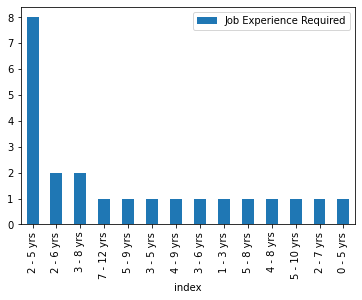

In [62]:
print('Experience required for Data Scientists: 2-12 years')
df = naukri_data[naukri_data['Job Title']==' Data Scientist']
df1 = df['Job Experience Required'].value_counts().reset_index()
df1.plot(kind='bar', x='index', y='Job Experience Required')

In [65]:
naukri_data['Job Title']=naukri_data['Job Title'].str.strip().str.lower()
naukri_data['Role']=naukri_data['Role'].str.strip().str.lower()
naukri_data['Role Category']=naukri_data['Role Category'].str.strip().str.lower()
naukri_data['Key Skills']=naukri_data['Key Skills'].str.strip().str.lower()
naukri_data['Functional Area']=naukri_data['Functional Area'].str.strip().str.lower()
a = pd.DataFrame(naukri_data['Job Title'].unique())
a.shape
naukri_data['Title'] = np.nan
naukri_data['Title'] =a
naukri_data['Title'].shape
naukri_data.dropna(inplace = True)
naukri_data.shape


(19142, 10)

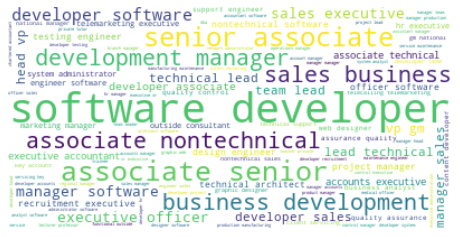

In [66]:
#### Let's produce a word cloud for different Job Role

from wordcloud import WordCloud
def plot_wordcloud(msg):
    plt.figure(figsize=(8,8))
    wordcloud = WordCloud(max_font_size=120, background_color="white").generate(", ".join(msg))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()  
    img_path = "./wordcloud.png"
    wordcloud.to_file(img_path)
    
plot_wordcloud(naukri_data['Role'])


**Observation**: Software developer is the most commonly used word in Role. Associate nontechnical and associate senior are also popular in Job wordcloud.

### Let's create a content-based recommender

Let's build a recommnedation engine that computes similarity between job Title based on job metadata and suggests jobs that are most similar to a particular job that a user liked.

In [68]:
# Creates a column that contains a combintion of Role,Key Skills,Role Category and Functional Area
naukri_data['soup'] = naukri_data['Role'] + naukri_data['Key Skills'] + naukri_data['Role Category'] + naukri_data['Functional Area']


In [70]:
naukri_data['soup']

0        media planning executive/managermedia planning...
1        sales executive/officerpre sales| closing| sof...
2        r&d executivecomputer science| fabrication| qu...
3        technical support engineertechnical supportadm...
4        testing engineermanual testing| test engineeri...
                               ...                        
21229    sales/business development managerhni| life in...
21230    sales/business development managerb2b| busines...
21231    associate/senior associate -(technical)network...
21232    telesales/telemarketing executive/officersales...
21233    software developerc++| c| design| mysql| javas...
Name: soup, Length: 19142, dtype: object

In [72]:
naukri_data['soup'][0]

'media planning executive/managermedia planning| digital mediaadvertisingmarketing , advertising , mr , pr , media planning'

In [74]:
# Vectorizes words to numbers and builds a sparse matrix
count = CountVectorizer(analyzer='word',ngram_range=(1, 2), stop_words='english')
#print (count)
count_matrix = count.fit_transform(naukri_data['soup'])
print (count_matrix)

  (0, 73578)	2
  (0, 86352)	3
  (0, 43403)	1
  (0, 70230)	1
  (0, 36294)	1
  (0, 73831)	1
  (0, 4024)	1
  (0, 76622)	1
  (0, 87894)	1
  (0, 73737)	2
  (0, 86460)	1
  (0, 43988)	1
  (0, 70234)	1
  (0, 86440)	1
  (0, 36332)	1
  (0, 73832)	1
  (0, 4075)	1
  (0, 76629)	1
  (0, 87909)	1
  (1, 43403)	1
  (1, 98147)	2
  (1, 80694)	1
  (1, 20035)	1
  (1, 106351)	1
  (1, 61715)	1
  :	:
  (19140, 2827)	1
  (19140, 80802)	1
  (19140, 46011)	1
  (19140, 115771)	1
  (19140, 103831)	1
  (19141, 106351)	2
  (19141, 29411)	1
  (19141, 30907)	1
  (19141, 30909)	1
  (19141, 38222)	1
  (19141, 58422)	1
  (19141, 114886)	1
  (19141, 107101)	1
  (19141, 38236)	1
  (19141, 58448)	1
  (19141, 60053)	1
  (19141, 31782)	1
  (19141, 106496)	1
  (19141, 77194)	1
  (19141, 54882)	1
  (19141, 29865)	1
  (19141, 54883)	1
  (19141, 77266)	1
  (19141, 60148)	1
  (19141, 31811)	1


In [ ]:
#Computes similarity between movies using cosine similarity metric
cosine_sim = cosine_similarity(count_matrix, count_matrix)

cosine_sim.shape


In [75]:
#Getting the Job Title along with the index
naukri_data = naukri_data.reset_index()
titles = naukri_data['Title']
print (titles)
indices = pd.Series(naukri_data.index, index=naukri_data['Title'])
print (indices)

0                                    digital media planner
1                                 online bidding executive
2        trainee research/ research executive- hi- tech...
3                                        technical support
4                        software test engineer -hyderabad
                               ...                        
19137                           backup &amp; storage admin
19138                                    online pharmacist
19139                                mts-software-engineer
19140                                     assoc. prof.- cs
19141           application/cyber security specialist-pune
Name: Title, Length: 19142, dtype: object
Title
digital media planner                                            0
online bidding executive                                         1
trainee research/ research executive- hi- tech operations        2
technical support                                                3
software test engineer -hyderabad  

In [ ]:
def recommendations(title):
    
    #Extract index of job tilte
    idx = indices[title]
    
    #Extract the similarity scores and their corresponding index for every job from the cosine similarity matrix
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    #Sort the (index,score) tuples in decreasing order of similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #Select top 25
    sim_scores = sim_scores[1:26]
    print ("Sim_scores",sim_scores)
    #Store the cosine_sim indices of the top 25 jobs in a list
    job_indices = [i[0] for i in sim_scores]
    
    #Extract metadata of the jobs
    job = naukri_data.iloc[job_indices][['Title','Role', 'Role Category', 'Job Salary','Location']]
     
    #Sort the jobs in decreasing order of predicted rating 
    job = job.sort_values('Title', ascending=False)
    
    #Return top 10 jobs as recommendations
    return job.head(10)


In [ ]:
recommendations('software engineer')